In [10]:
import os

import numpy as np

import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
batch_size=4

transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

trainset = torchvision.datasets.MNIST(root='/mnt/t-achetan/datasets/', train=False,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)


In [22]:
type(trainset.class_to_idx)

dict

In [3]:
from torch.utils.data import Subset, DataLoader

In [12]:
use_idx

(array([   2,    5,   14, ..., 9984, 9991, 9994]),)

In [4]:
use_idx = np.where(np.isin(trainset.targets, [1, 8]) == True)
x = Subset(trainset, use_idx)
x

In [7]:
vars(x)

{'dataset': Dataset MNIST
     Number of datapoints: 10000
     Root location: /mnt/t-achetan/datasets/
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.1307,), std=(0.3081,))
            ),
 'indices': (array([   2,    5,   14, ..., 9984, 9991, 9994]),)}

In [9]:
dl = DataLoader(x, shuffle=False, batch_size=8)

for idx, (X, y) in enumerate(dl):
    print(X.shape, y.shape)
    plt.imshow(X[0].reshape(28, 28))
    break

ValueError: only one element tensors can be converted to Python scalars

In [11]:
next(iter(dl))

ValueError: only one element tensors can be converted to Python scalars

In [13]:
np.unique(trainset.targets)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

AttributeError: 'Subset' object has no attribute 'targets'

In [ ]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(npimg)
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
plt.imshow(torchvision.utils.make_grid(images, nrow=4).reshape(-1, 122))
# print labels
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [ ]:
import pycuda.autoinit
import numpy as np
import pycuda.gpuarray as gpuarray
import skcuda.linalg as linalg
from skcuda.linalg import PCA as cuPCA
from sklearn.decomposition import PCA

In [ ]:
X = np.random.rand(1000, 1000)

In [ ]:
b

In [ ]:
trainset_all = torch.zeros(60000, 784)
trainset_labels_all = torch.zeros(60000)
for i in range(len(trainset)):
    trainset_all[i] = trainset[i][0].reshape(-1)
    trainset_labels_all[i] = trainset[i][1]

In [ ]:
a = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
b = np.array([0, 1, 2])


In [ ]:
a[np.arange(3), b] = 1
a

In [ ]:
a[np.arange(3), ~b] = 2
a

In [ ]:
~b

In [ ]:
a = np.array([1, 2, 3, 4])
np.where(a == [1, 2, 5, 7])

In [ ]:
a[np.isin(a, [1, 2, 5, 7])]

# Testing the MNIST dataset

In [1]:
import os
os.chdir("/data/t-achetan/adv_geom/src/")
import numpy as np
from datagen.real.mnist import MNISTManifolds

In [2]:
cfg_dict = MNISTManifolds.get_demo_cfg_dict()
cfg_dict["train"]["num_neg"] = 2
cfg_dict["train"]["transform"] = None
cfg_dict["train"]["on_mfld_path"] = "/mnt/t-achetan/datasets/"
cfg_dict["val"]["num_neg"] = 2
cfg_dict["val"]["on_mfld_path"] = "/mnt/t-achetan/datasets/"
cfg_dict["test"]["num_neg"] = 2
cfg_dict["test"]["on_mfld_path"] = "/mnt/t-achetan/datasets/"
cfg_dict

{'strategy': 'only',
 'has_val': False,
 'train': {'on_mfld_path': '/mnt/t-achetan/datasets/',
  'k': 25,
  'n': 784,
  'use_labels': [1, 8],
  'off_mfld_label': 9,
  'split': 'train',
  'seed': 23,
  'num_neg': 2,
  'nn': 50,
  'buf_nn': 2,
  'max_t_delta': 0.001,
  'max_norm': 0.1,
  'M': 1.0,
  'transform': None},
 'val': {'on_mfld_path': '/mnt/t-achetan/datasets/',
  'k': 25,
  'n': 784,
  'use_labels': [1, 8],
  'off_mfld_label': 9,
  'split': 'test',
  'seed': 23,
  'num_neg': 2,
  'nn': 50,
  'buf_nn': 2,
  'max_t_delta': 0.001,
  'max_norm': 0.1,
  'M': 1.0,
  'transform': 'default'},
 'test': {'on_mfld_path': '/mnt/t-achetan/datasets/',
  'k': 25,
  'n': 784,
  'use_labels': [1, 8],
  'off_mfld_label': 9,
  'split': 'test',
  'seed': 23,
  'num_neg': 2,
  'nn': 50,
  'buf_nn': 2,
  'max_t_delta': 0.001,
  'max_norm': 0.1,
  'M': 1.0,
  'transform': 'default'}}

In [3]:
# trainset, valset, testset = MNISTManifolds.make_train_val_test_splits(cfg_dict)
# MNISTManifolds.save_splits(trainset, valset, testset, "/mnt/tmp/")

In [4]:
# trainset, valset, testset = MNISTManifolds.load_splits("/mnt/tmp/")

In [5]:
trainset = MNISTManifolds(**cfg_dict["train"])
trainset.compute_points()

20-06-2022 08:42:15 -- [I] root | [mnist.py:98 -     load_raw_om_data()] >> [MNISTManifolds]: loading MNIST dataset
20-06-2022 08:42:15 -- [I] root | [mnist.py:101 -     load_raw_om_data()] >> [MNISTManifolds]: MNIST data loaded
flattening data: 8it [00:01,  7.56it/s]
20-06-2022 08:42:16 -- [I] root | [manifolds.py:463 -       compute_points()] >> [MNISTManifolds]: initialised on-mfld points
20-06-2022 08:42:16 -- [I] root | [manifolds.py:467 -       compute_points()] >> [MNISTManifolds]: created poca idx
20-06-2022 08:42:16 -- [I] root | [manifolds.py:323 - make_inferred_off_mfld()] >> [MNISTManifolds]: knn not computed. computing now ...
20-06-2022 08:42:16 -- [I] root | [manifolds.py:290 -             find_knn()] >> [MNISTManifolds]: fitting knn...
20-06-2022 08:42:20 -- [I] root | [manifolds.py:292 -             find_knn()] >> [MNISTManifolds]: knn fit done
20-06-2022 08:42:20 -- [I] root | [manifolds.py:294 -             find_knn()] >> [MNISTManifolds]: predicting nbhrs...
20-06-2

In [6]:
trainset.nn_distances

array([[4.5776367e-05, 2.7074280e+00, 2.8842926e+00, ..., 7.2519989e+00,
        7.3389511e+00, 7.3677902e+00],
       [3.0517578e-05, 4.7076035e+00, 4.8626175e+00, ..., 8.4344826e+00,
        8.4390335e+00, 8.4494629e+00],
       [0.0000000e+00, 2.8342934e+00, 3.2277145e+00, ..., 6.1192894e+00,
        6.1320038e+00, 6.1363373e+00],
       ...,
       [0.0000000e+00, 8.7104454e+00, 1.0037483e+01, ..., 1.6354355e+01,
        1.6415474e+01, 1.6420826e+01],
       [4.5776367e-05, 2.2583633e+01, 2.5336044e+01, ..., 3.7348679e+01,
        3.7529022e+01, 3.7603638e+01],
       [2.2888184e-05, 1.6722267e+01, 2.1389450e+01, ..., 4.4570419e+01,
        4.4662117e+01, 4.4682083e+01]], dtype=float32)

In [7]:
nn_distances = trainset.nn_distances[trainset.nn_indices != np.arange(trainset.nn_indices.shape[0]).reshape(-1, 1)].reshape(trainset.nn_indices.shape[0], trainset.nn_indices.shape[1] - 1)
nn_indices = trainset.nn_indices[trainset.nn_indices != np.arange(trainset.nn_indices.shape[0]).reshape(-1, 1)].reshape(trainset.nn_indices.shape[0], trainset.nn_indices.shape[1] - 1)


In [28]:
nn_distances[5711], nn_indices[5711], trainset.on_mfld_class_labels[5711], trainset.on_mfld_class_labels[nn_indices[5711]]

(array([34.819656, 35.737534, 37.3199  , 37.664207, 38.056656, 41.540817,
        44.499245, 45.390526, 47.0804  , 47.856842, 47.920258, 48.90954 ,
        49.067863, 49.475555, 51.987778, 52.074127, 52.373596, 52.511734,
        52.67787 , 52.98195 , 53.087936, 53.27179 , 53.277817, 53.377167,
        53.47502 , 53.990044, 54.120438, 54.631348, 55.192795, 56.062454,
        56.611176, 56.672287, 56.98806 , 57.21768 , 57.39261 , 57.51416 ,
        57.90001 , 58.197296, 58.321136, 58.404236, 59.225525, 59.247047,
        59.433258, 60.019043, 60.33113 , 60.6718  , 60.683838, 60.773636,
        61.354065, 61.452957, 61.530304], dtype=float32),
 array([ 4516, 10067,  7756,  5696,  6868,  4490,  3771,  7938,  5700,
         4525,  9539, 11591,  7285,  5721,  8267,  4500,  3735, 11619,
         5709,  5767,  8675,  8724,  8922,  4493,  5692,  7910,  5713,
         4208,  6899,  8856,  7231,  8740,  6230,  5714,  9028, 10064,
         1786,  7567,  9530,  9463,  7576,   587,  5270, 10966,  4

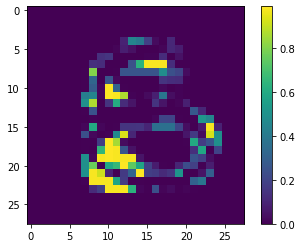

In [42]:
plt.imshow(((trainset.on_mfld_pts[4638] - trainset.on_mfld_pts[5711])**2).reshape(28, 28))
plt.colorbar()

In [41]:
np.linalg.norm(((trainset.on_mfld_pts[4516] - trainset.on_mfld_pts[5711])).ravel(), ord=2)**2

34.81960652816633

## Computing statistics for distance values in MNIST

In [12]:
nn_distances = trainset.nn_distances[trainset.nn_indices != np.arange(trainset.nn_indices.shape[0]).reshape(-1, 1)].reshape(trainset.nn_indices.shape[0], trainset.nn_indices.shape[1] - 1)


In [13]:
pct_pts = [10, 25, 50, 75, 100]

percentiles = np.percentile(nn_distances, pct_pts, axis=1)
np.mean(nn_distances * (nn_distances <= percentiles[1].reshape(-1, 1)).reshape(nn_distances.shape[0], -1), axis=1)

array([1.0017663, 1.3751915, 1.0450364, ..., 2.871921 , 7.2722306,
       7.9580164], dtype=float32)

In [14]:
classes = [8]
pct_pts = [5, 10, 25, 50, 75, 100]

mean_distances = {i: None for i in pct_pts}
nn_distances_select = nn_distances[np.isin(trainset.class_labels[trainset.num_neg:], classes)]
percentiles = np.percentile(nn_distances_select, pct_pts, axis=1)

for j in range(len(pct_pts)):
    mean_distances[pct_pts[j]] = np.mean(nn_distances_select * (nn_distances_select <= percentiles[j].reshape(-1, 1)).reshape(nn_distances_select.shape[0], -1), axis=1)

mean_distances


{5: array([1.1662766, 1.2477634, 1.2639607, ..., 1.1617954, 1.4641262,
        1.2887625], dtype=float32),
 10: array([2.4774837, 2.6820338, 2.5989583, ..., 2.510227 , 3.0993817,
        3.1420264], dtype=float32),
 25: array([5.9177537, 6.582519 , 6.0818887, ..., 6.194475 , 7.2722306,
        7.9580164], dtype=float32),
 50: array([12.876053, 14.360134, 13.143404, ..., 14.161961, 15.816955,
        17.72011 ], dtype=float32),
 75: array([19.68874 , 22.16143 , 19.91775 , ..., 22.011206, 24.126354,
        27.29501 ], dtype=float32),
 100: array([27.493433, 31.430986, 27.51527 , ..., 30.86298 , 33.515846,
        38.383324], dtype=float32)}

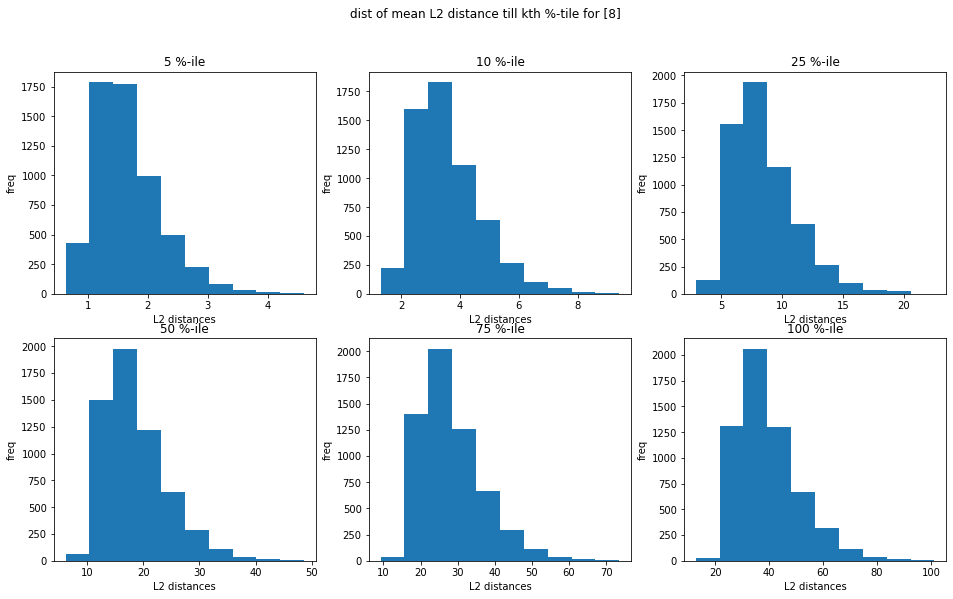

In [15]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 3, figsize=(16, 9))
row=0
col=0
for i in pct_pts:
    
    ax = axs[row][col] 
    ax.hist(mean_distances[i])
    ax.set_xlabel("L2 distances")
    ax.set_ylabel("freq")
    ax.set_title("{} %-ile".format(i, classes))
    col+=1
    if col == 3:
        row+=1
        col=0
fig.suptitle("dist of mean L2 distance till kth %-tile for {}".format(classes))
plt.show()
plt.close()

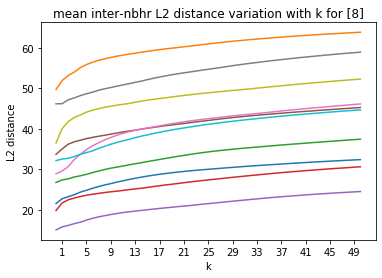

In [16]:
idx = np.random.choice(np.arange(nn_distances_select.shape[0]), size=10)
cum_mean_distances = np.cumsum(nn_distances_select, axis=1) / np.arange(1, 52)
for i in idx:
    plt.plot(cum_mean_distances[i])
plt.xlabel("k")
# plt.gca().set_yscale('log')
plt.xticks(np.arange(1, 52, step=4))
plt.ylabel("L2 distance")
plt.title("mean inter-nbhr L2 distance variation with k for {}".format(classes))
plt.show()

In [27]:
idx, cum_mean_distances[5711]

(array([2543, 5711, 1880, 4060, 5024, 2997, 1474, 1700, 3913, 1206]),
 array([49.70117188, 51.88420868, 53.15441386, 53.98399734, 55.09470825,
        55.8475647 , 56.4281311 , 56.88964844, 57.26018609, 57.61781006,
        57.9204157 , 58.19170634, 58.42898325, 58.65499442, 58.88402913,
        59.11137772, 59.33072797, 59.53109402, 59.71704102, 59.88448486,
        60.05834961, 60.23217773, 60.39786961, 60.57809957, 60.76724609,
        60.94695575, 61.11967864, 61.28321184, 61.44143572, 61.59574788,
        61.74137632, 61.87823486, 62.01181493, 62.13961972, 62.26171875,
        62.38136122, 62.49613334, 62.61450838, 62.72697566, 62.83530884,
        62.94036419, 63.04188174, 63.13929642, 63.23403653, 63.32476128,
        63.41201915, 63.4964262 , 63.57827759, 63.65968292, 63.74148926,
        63.82029335]))

In [159]:
trainset.nn_indices

array([[    0,     5,  1820, ...,  9108,  1740,  4691],
       [    1,  6201,  4392, ...,  8878,   487,  1961],
       [    2, 10830, 10876, ...,  7053,  4196,  6644],
       ...,
       [12590,  5028,  8769, ...,  6304,   904, 12260],
       [12591,   356,    18, ..., 10557,  9349, 10731],
       [12592,  5077, 10978, ...,  7486,  7500,  5102]])

In [165]:
np.linalg.norm(trainset.all_points[0] - trainset.all_points[5], 2)

25.131271

In [16]:
trainset.all_actual_distances[:10], trainset.class_idx[:10], trainset.class_labels[:10], trainset.pre_class_labels[:10]

(array([[0.06698781, 1.        ],
        [1.        , 0.0960109 ],
        [0.        , 1.        ],
        [0.        , 1.        ],
        [0.        , 1.        ],
        [0.        , 1.        ],
        [1.        , 0.        ],
        [0.        , 1.        ],
        [0.        , 1.        ],
        [1.        , 0.        ]]),
 array([2, 2, 0, 0, 0, 0, 1, 0, 0, 1]),
 array([9, 9, 1, 1, 1, 1, 8, 1, 1, 8]),
 array([1, 8, 1, 1, 1, 1, 8, 1, 1, 8]))

tensor(0.0670, dtype=torch.float64)


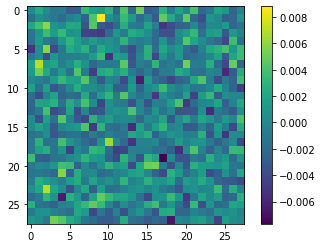

In [13]:
import torch
idx = 0
diff = trainset.all_points[idx] - trainset.on_mfld_pts[trainset.poca_idx[idx]]
print(torch.norm(diff, p=2))
plt.imshow(diff.reshape(28, 28))
plt.colorbar()

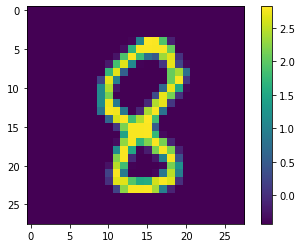

In [12]:
plt.imshow(trainset.on_mfld_pts[trainset.poca_idx[1]].reshape(28, 28))
plt.colorbar()

In [50]:
plt.imshow()

(array([ 1084, 10514]), array([1, 1]))

In [18]:
trainset.all_actual_distances[0], trainset.class_idx[0], trainset.class_labels[0], trainset.pre_class_labels[0]

(array([0.06698781, 1.        ]), 2, 9, 1)

In [10]:
trainset.on_mfld_pts.shape

torch.Size([12593, 784])

In [14]:
import torchvision
torchvision.datasets.MNIST("/mnt/t-achetan/datasets/",\
             train=True, download=False)

Dataset MNIST
    Number of datapoints: 60000
    Root location: /mnt/t-achetan/datasets/
    Split: Train

In [6]:
import numpy as np
import torch
np.array(torch.Tensor([1, 2, 3]))

array([1., 2., 3.], dtype=float32)

In [3]:
vars(trainset)

{'root': '/mnt/t-achetan/datasets/',
 'transform': Compose(
     ToTensor()
     Normalize(mean=(0.1307,), std=(0.3081,))
 ),
 'target_transform': None,
 'transforms': StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.1307,), std=(0.3081,))
            ),
 'train': False,
 'data': tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
      

In [10]:
trainset.targets[np.isin(trainset.targets, [1, 2])]

tensor([2, 1, 1,  ..., 2, 1, 2])

In [5]:
np.isin(trainset.targets, [1, 2])

array([False,  True,  True, ..., False, False, False])

In [5]:
import numpy as np
a= np.array([[1, 2], [3, 4], [5, 6]])
a[np.arange(3), np.array([0, 1, 0])] = 0
a

array([[0, 2],
       [3, 0],
       [0, 6]])

In [7]:
a = np.array([1, 2, 3])
b = np.array([1, 2])
(b[:, None] == a).argmax(axis=0)

array([0, 1, 0])

In [9]:
from torch.utils.data import DataLoader
dl = DataLoader(trainset, batch_size=4096, shuffle=False, num_workers=8)


In [10]:
hasattr(dl.dataset, "use_labels")

True

In [95]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
a[a > 3]

array([4, 5, 6, 7, 8])

In [44]:
a = np.array([[1, 2, 3], [4, 5, 6]])
(a[:, 1:] > 3).all(axis=1)

array([False,  True])